## Analyse des Correspondances Multiples

On importe la librairie pandas pour charger les données, ainsi que la classe MCA du package fanalysis.

In [1]:
import pandas as pd
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table("data/data_acm.txt", header=0, index_col=0)
df
#fichier excel 
#df = pd.read_excel("lien excel")


Taille    Poids Velocite Intelligence Affection Agressivite  \
Chien                                                                           
Beauceron       Taille++   Poids+  Veloc++      Intell+    Affec+     Agress+   
Basset           Taille-   Poids-   Veloc-      Intell-    Affec-     Agress+   
Berger All      Taille++   Poids+  Veloc++     Intell++    Affec+     Agress+   
Boxer            Taille+   Poids+   Veloc+      Intell+    Affec+     Agress+   
Bull-Dog         Taille-   Poids-   Veloc-      Intell+    Affec+     Agress-   
Bull-Mastif     Taille++  Poids++   Veloc-     Intell++    Affec-     Agress+   
Caniche          Taille-   Poids-   Veloc+     Intell++    Affec+     Agress-   
Chihuahua        Taille-   Poids-   Veloc-      Intell-    Affec+     Agress-   
Cocker           Taille+   Poids-   Veloc-      Intell+    Affec+     Agress+   
Colley          Taille++   Poids+  Veloc++      Intell+    Affec+     Agress-   
Dalmatien        Taille+   Poids+   Veloc+      Intell+    Affec+     Agress-   
Doberman        Taille++   Poids+  Veloc++     Intell++    Affec-     Agress+   
Dogue All       Taille++  Poids++  Veloc++      Intell-    Affec-     Agress+   
Epag. Breton     Taille+   Poids+   Veloc+     Intell++    Affec+     Agress-   
Epag. Français  Taille++   Poids+   Veloc+      Intell+    Affec-     Agress-   
Fox-Hound       Taille++   Poids+  Veloc++      Intell-    Affec-     Agress+   
Fox-Terrier      Taille-   Poids-   Veloc+      Intell+    Affec+     Agress+   
Gd Bleu Gasc    Taille++   Poids+   Veloc+      Intell-    Affec-     Agress+   
Labrador         Taille+   Poids+   Veloc+      Intell+    Affec+     Agress-   
Levrier         Taille++   Poids+  Veloc++      Intell-    Affec-     Agress-   
Mastiff         Taille++  Poids++   Veloc-      Intell-    Affec-     Agress+   
Pekinois         Taille-   Poids-   Veloc-      Intell-    Affec+     Agress-   
Pointer         Taille++   Poids+  Veloc++     Intell++    Affec-     Agress-   
St-Bernard      Taille++  Poids++   Veloc-      Intell+    Affec-     Agress+   
Setter          Taille++   Poids+  Veloc++      Intell+    Affec-     Agress-   
Teckel           Taille-   Poids-   Veloc-      Intell+    Affec+     Agress-   
Terre-Neuve     Taille++  Poids++   Veloc-      Intell+    Affec-     Agress-   

                 Fonction  
Chien                      
Beauceron         utilite  
Basset             chasse  
Berger All        utilite  
Boxer           compagnie  
Bull-Dog        compagnie  
Bull-Mastif       utilite  
Caniche         compagnie  
Chihuahua       compagnie  
Cocker          compagnie  
Colley          compagnie  
Dalmatien       compagnie  
Doberman          utilite  
Dogue All         utilite  
Epag. Breton       chasse  
Epag. Français     chasse  
Fox-Hound          chasse  
Fox-Terrier     compagnie  
Gd Bleu Gasc       chasse  
Labrador           chasse  
Levrier            chasse  
Mastiff           utilite  
Pekinois        compagnie  
Pointer            chasse  
St-Bernard        utilite  
Setter             chasse  
Teckel          compagnie  
Terre-Neuve       utilite

L'analyse va porter sur les 6 premières variables.

In [3]:
df.describe()

Taille   Poids Velocite Intelligence Affection Agressivite  \
count         27      27       27           27        27          27   
unique         3       3        3            3         2           2   
top     Taille++  Poids+   Veloc-      Intell+    Affec+     Agress-   
freq          15      14       10           13        14          14   

         Fonction  
count          27  
unique          3  
top     compagnie  
freq           10

In [5]:
#récupération des données du data frame des colonnes de 0 à 6 non inclus
X = df.iloc[:, 0:6].values
X

array([['Taille++', 'Poids+', 'Veloc++', 'Intell+', 'Affec+', 'Agress+'],
       ['Taille-', 'Poids-', 'Veloc-', 'Intell-', 'Affec-', 'Agress+'],
       ['Taille++', 'Poids+', 'Veloc++', 'Intell++', 'Affec+', 'Agress+'],
       ['Taille+', 'Poids+', 'Veloc+', 'Intell+', 'Affec+', 'Agress+'],
       ['Taille-', 'Poids-', 'Veloc-', 'Intell+', 'Affec+', 'Agress-'],
       ['Taille++', 'Poids++', 'Veloc-', 'Intell++', 'Affec-', 'Agress+'],
       ['Taille-', 'Poids-', 'Veloc+', 'Intell++', 'Affec+', 'Agress-'],
       ['Taille-', 'Poids-', 'Veloc-', 'Intell-', 'Affec+', 'Agress-'],
       ['Taille+', 'Poids-', 'Veloc-', 'Intell+', 'Affec+', 'Agress+'],
       ['Taille++', 'Poids+', 'Veloc++', 'Intell+', 'Affec+', 'Agress-'],
       ['Taille+', 'Poids+', 'Veloc+', 'Intell+', 'Affec+', 'Agress-'],
       ['Taille++', 'Poids+', 'Veloc++', 'Intell++', 'Affec-', 'Agress+'],
       ['Taille++', 'Poids++', 'Veloc++', 'Intell-', 'Affec-', 'Agress+'],
       ['Taille+', 'Poids+', 'Veloc+', 'Intell+

On crée une instance de la classe MCA, en lui passant ici des étiquettes pour les lignes et les variables. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [7]:
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[0:6])
print(df.index.values)

['Beauceron' 'Basset' 'Berger All' 'Boxer' 'Bull-Dog' 'Bull-Mastif'
 'Caniche' 'Chihuahua' 'Cocker' 'Colley' 'Dalmatien' 'Doberman'
 'Dogue All' 'Epag. Breton' 'Epag. Français' 'Fox-Hound' 'Fox-Terrier'
 'Gd Bleu Gasc' 'Labrador' 'Levrier' 'Mastiff' 'Pekinois' 'Pointer'
 'St-Bernard' 'Setter' 'Teckel' 'Terre-Neuve']


On estime le modèle en appliquant la méthode fit de la classe MCA sur le jeu de données.

In [8]:
my_mca.fit(X)

MCA(row_labels=array(['Beauceron', 'Basset', 'Berger All', 'Boxer', 'Bull-Dog',
       'Bull-Mastif', 'Caniche', 'Chihuahua', 'Cocker', 'Colley',
       'Dalmatien', 'Doberman', 'Dogue All', 'Epag. Breton',
       'Epag. Français', 'Fox-Hound', 'Fox-Terrier', 'Gd Bleu Gasc',
       'Labrador', 'Levrier', 'Mastiff', 'Pekinois', 'Pointer',
       'St-Bernard', 'Setter', 'Teckel', 'Terre-Neuve'], dtype=object),
    var_labels=array(['Taille', 'Poids', 'Velocite', 'Intelligence', 'Affection',
       'Agressivite'], dtype=object))

L'exécution de la méthode my_mca.fit(X) provoque a minima le calcul des attributs :

* my_pca.eig_ : valeurs propres
* my_pca.row_coord_ : coordonnées des points lignes
* my_pca.col_coord_ : coordonnées des points colonnes

### 1. Analyse des valeurs propres

L'attribut my_mca.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [18]:
print(my_mca.eig_)
#nombre de dimension = nb de crochets à la fin 
print("affichage des pourcentages des variances cumulées")
[print("Le pourcentage de variance de chaque axe,", i+1,"=", my_mca.eig_[2][i])for i in range (len(my_mca.eig_[2]))]

[[4.81606165e-01 3.84737288e-01 2.10954049e-01 1.57554025e-01
  1.50132670e-01 1.23295308e-01 8.14624601e-02 4.56697566e-02
  2.35419107e-02 7.71303416e-03]
 [2.88963699e+01 2.30842373e+01 1.26572430e+01 9.45324152e+00
  9.00796020e+00 7.39771849e+00 4.88774761e+00 2.74018539e+00
  1.41251464e+00 4.62782050e-01]
 [2.88963699e+01 5.19806071e+01 6.46378501e+01 7.40910916e+01
  8.30990518e+01 9.04967703e+01 9.53845179e+01 9.81247033e+01
  9.95372180e+01 1.00000000e+02]]
affichage des pourcentages des variances cumulées
Le pourcentage de variance de chaque axe, 1 = 28.896369878225205
Le pourcentage de variance de chaque axe, 2 = 51.98060714425616
Le pourcentage de variance de chaque axe, 3 = 64.6378501028817
Le pourcentage de variance de chaque axe, 4 = 74.0910916257477
Le pourcentage de variance de chaque axe, 5 = 83.09905182111238
Le pourcentage de variance de chaque axe, 6 = 90.49677030878777
Le pourcentage de variance de chaque axe, 7 = 95.38451791500202
Le pourcentage de variance de c

[None, None, None, None, None, None, None, None, None, None]

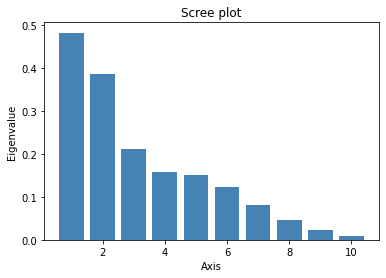

In [19]:
my_mca.plot_eigenvalues()

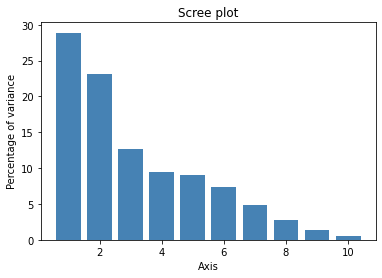

In [20]:
my_mca.plot_eigenvalues(type="percentage")

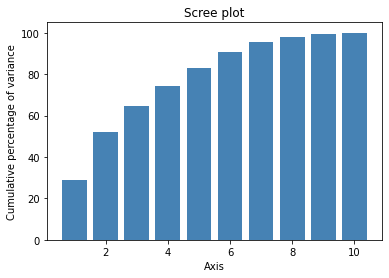

In [21]:
my_mca.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode my_mca.fit(X), les statistiques suivantes ont été calculées :

* my_mca.row_contrib_ : contributions des points lignes à la variance de l'axe
* my_mca.col_contrib_ : contributions des points colonnes à la variance de l'axe
* my_mca.row_cos2_ : cosinus carrés des points lignes
* my_mca.col_cos2_ : cosinus carrés des points colonnes

### 2. Extraction des statistiques sur les points lignes

In [22]:
df_rows = my_mca.row_topandas()
print(df_rows)

                row_coord_dim1  row_coord_dim2  row_coord_dim3  \
Beauceron            -0.317200       -0.417701       -0.101468   
Basset                0.254110        1.101227       -0.190701   
Berger All           -0.486396       -0.464450       -0.498134   
Boxer                 0.447365       -0.881778        0.692016   
Bull-Dog              1.013352        0.549879       -0.163423   
Bull-Mastif          -0.752574        0.546912        0.497573   
Caniche               0.912301       -0.016188       -0.576570   
Chihuahua             0.840799        0.843852       -0.469947   
Cocker                0.733295        0.079073        0.662230   
Colley               -0.117325       -0.526108       -0.334894   
Dalmatien             0.647240       -0.990184        0.458590   
Doberman             -0.873210       -0.315481       -0.452314   
Dogue All            -1.047017        0.506958        0.165035   
Epag. Breton          0.478044       -1.036933        0.061924   
Epag. Fran

In [33]:
# Coordonnées des points lignes
#print(my_mca.row_coord_)
print("Affichage des coordonnées des points lignes (individus) dans chaque axe:\n")
for line in range(len(my_mca.row_coord_)):
    print("Les coordonnées de l'individu", df.index.values[line], "sont:", my_mca.row_coord_[line],"\n")

Affichage des coordonnées des points lignes (individus) dans chaque axe:

Les coordonnées de l'individu Beauceron sont: [-0.31720005 -0.4177013  -0.10146771 -0.21143628 -0.11850954 -0.84491727
 -0.08905015  0.20198641 -0.16701884  0.02280671] 

Les coordonnées de l'individu Basset sont: [ 0.25410984  1.10122699 -0.19070097  0.29263727 -0.52400852  0.03989468
 -0.05283316 -0.44736292  0.10073837  0.1471022 ] 

Les coordonnées de l'individu Berger All sont: [-0.48639553 -0.46444958 -0.49813388  0.57742525  0.27590205 -0.56776484
  0.12909684  0.18733032 -0.234185   -0.00891993] 

Les coordonnées de l'individu Boxer sont: [ 0.44736492 -0.88177794  0.6920158   0.26000184 -0.45558984 -0.21374584
  0.00300768 -0.01981927 -0.00244629  0.14090095] 

Les coordonnées de l'individu Bull-Dog sont: [ 1.01335218  0.54987949 -0.1634232  -0.34991927  0.33078648 -0.20141418
 -0.06354408 -0.07903568 -0.03560244  0.06654325] 

Les coordonnées de l'individu Bull-Mastif sont: [-0.75257449  0.54691183  0.49

In [32]:
# Contributions des points lignes
#print(my_mca.row_contrib_)
print("Affichage des contributions des points lignes (individus) dans chaque axe:\n")
for line in range(len(my_mca.row_contrib_)):
    print("Les contributions de l'individu", df.index.values[line], "sont:", my_mca.row_contrib_[line],"\n")
    
    

Affichage des contributions des points lignes (individus) dans chaque axe:

Les contributions de l'individu Beauceron sont: [ 0.77376788  1.67959126  0.18076074  1.05091056  0.34647163 21.44460561
  0.36053553  3.30865774  4.38859435  0.2497678 ] 

Les contributions de l'individu Basset sont: [ 0.49657766 11.6741602   0.63849009  2.01310302  6.7738835   0.0478101
  0.12690884 16.23033608  1.59655665 10.39080743] 

Les contributions de l'individu Berger All sont: [1.81937974 2.07658208 4.35652825 7.83787399 1.8778932  9.68337324
 0.75772206 2.8459266  8.62805061 0.03820624] 

Les contributions de l'individu Boxer sont: [1.53910433e+00 7.48497608e+00 8.40776174e+00 1.58913049e+00
 5.12046123e+00 1.37241366e+00 4.11284205e-04 3.18553782e-02
 9.41477848e-04 9.53320231e+00] 

Les contributions de l'individu Bull-Dog sont: [7.89705226 2.91076402 0.46889522 2.87834243 2.69933348 1.21862409
 0.18358151 0.50658688 0.19941323 2.12627267] 

Les contributions de l'individu Bull-Mastif sont: [ 4.35

In [31]:
# Cos2 des points lignes
#print(my_mca.row_cos2_)
print("Affichage de la qualité des points lignes (individus) dans chaque axe:\n")
for line in range(len(my_mca.row_cos2_)):
    print("La qualité de l'individu", df.index.values[line], "est:", my_mca.row_cos2_[line],"\n")

Affichage de la qualité des points lignes (individus) dans chaque axe:

La qualité de l'individu Beauceron est: [8.86354732e-02 1.53699594e-01 9.06978140e-03 3.93822110e-02
 1.23722226e-02 6.28882412e-01 6.98570800e-03 3.59406044e-02
 2.45737810e-02 4.58212084e-04] 

La qualité de l'individu Basset est: [0.03380431 0.63486714 0.0190386  0.04483203 0.14374934 0.00083322
 0.00146131 0.10477294 0.00531274 0.01132837] 

La qualité de l'individu Berger All est: [1.53722499e-01 1.40163659e-01 1.61231704e-01 2.16645575e-01
 4.94615977e-02 2.09457186e-01 1.08290285e-02 2.28020784e-02
 3.56349731e-02 5.16989317e-05] 

La qualité de l'individu Boxer est: [1.11330751e-01 4.32523528e-01 2.66393303e-01 3.76048711e-02
 1.15462068e-01 2.54147956e-02 5.03216176e-06 2.18507578e-04
 3.32894680e-06 1.10438146e-02] 

La qualité de l'individu Bull-Dog est: [0.62448464 0.18388063 0.01624158 0.07446234 0.06654209 0.02467067
 0.00245556 0.00379881 0.00077083 0.00269283] 

La qualité de l'individu Bull-Mastif 

### 3. Extraction des statistiques sur les points colonnes

In [34]:
df_cols = my_mca.col_topandas()
print(df_cols)

                       col_coord_dim1  col_coord_dim2  col_coord_dim3  \
Taille_Taille+               0.851088       -1.231720        1.016052   
Taille_Taille++             -0.836675       -0.020578       -0.051217   
Taille_Taille-               1.184956        0.923897       -0.616000   
Poids_Poids+                -0.305405       -0.818876       -0.231272   
Poids_Poids++               -1.015134        0.973901        1.221595   
Poids_Poids-                 1.168918        0.824345       -0.358770   
Velocite_Veloc+              0.603687       -0.887814        0.356312   
Velocite_Veloc++            -0.892100       -0.371832       -0.763088   
Velocite_Veloc-              0.319941        1.044900        0.401729   
Intelligence_Intell+         0.369443       -0.285503        0.493203   
Intelligence_Intell++       -0.335066       -0.459483       -0.599924   
Intelligence_Intell-        -0.349045        0.808555       -0.351511   
Affection_Affec+             0.775496       -0.2669

In [41]:
# Coordonnées des points colonnes
#print(my_mca.col_coord_)
print("Affichage des coordonnées des points colonnes (modalités) dans chaque axe:\n")
for line in range(len(my_mca.col_coord_)):
    print("Les coordonnées de la modalité",df_cols.index.values[line], "sont:\n", my_mca.col_coord_[line],"\n")

Affichage des coordonnées des points colonnes (modalités) dans chaque axe:

Les coordonnées de la modalité Taille_Taille+ sont:
 [ 0.85108805 -1.23171972  1.01605178  0.34245635 -0.31004022  0.11829709
  0.85830588 -0.25959948  0.30732198  0.01520824] 

Les coordonnées de la modalité Taille_Taille++ sont:
 [-0.83667535 -0.02057846 -0.05121744 -0.17022176  0.11266304 -0.04996469
 -0.11784406  0.05641401 -0.14463269 -0.12155001] 

Les coordonnées de la modalité Taille_Taille- sont:
 [ 1.18495571  0.9238965  -0.61599962  0.12014924 -0.0199635   0.02256927
 -0.36055265  0.06454103  0.09041149  0.24960128] 

Les coordonnées de la modalité Poids_Poids+ sont:
 [-0.30540525 -0.81887572 -0.23127208 -0.11836395 -0.19020146  0.0129084
  0.03717755 -0.12567337 -0.18494632  0.09757299] 

Les coordonnées de la modalité Poids_Poids++ sont:
 [-1.01513413  0.97390062  1.22159452  0.06760494  0.61451838  0.28923175
  0.06786357  0.64150795  0.20400871  0.07149381] 

Les coordonnées de la modalité Poids_

In [42]:
# Contributions des points colonnes
#print(my_mca.col_contrib_)
print("Affichage des contributions des points colonnes (modalités) dans chaque axe:\n")
for line in range(len(my_mca.col_contrib_)):
    print("Les contributions de la modalité",df_cols.index.values[line], "sont:\n", my_mca.col_contrib_[line],"\n")

Affichage des contributions des points colonnes (modalités) dans chaque axe:

Les contributions de la modalité Taille_Taille+ sont:
 [ 4.6420727  12.17067028 15.10423747  2.29739639  1.97613161  0.35031326
 27.91140155  4.55442881 12.38227698  0.09255242] 

Les contributions de la modalité Taille_Taille++ sont:
 [1.34585463e+01 1.01914919e-02 1.15139433e-01 1.70285200e+00
 7.82823704e-01 1.87480502e-01 1.57846191e+00 6.45240301e-01
 8.22749141e+00 1.77362173e+01] 

Les contributions de la modalité Taille_Taille- sont:
 [1.25978150e+01 9.58661729e+00 7.77241612e+00 3.95909184e-01
 1.14704658e-02 1.78513713e-02 6.89545420e+00 3.94117907e-01
 1.50033602e+00 3.49020865e+01] 

Les contributions de la modalité Poids_Poids+ sont:
 [1.67368602e+00 1.50620723e+01 2.19114722e+00 7.68462024e-01
 2.08240645e+00 1.16791442e-02 1.46628075e-01 2.98862105e+00
 1.25563298e+01 1.06671161e+01] 

Les contributions de la modalité Poids_Poids++ sont:
 [ 6.60404174  7.60886705 21.83339533  0.08953284  7.7633

In [43]:
# Cos2 des points colonnes
#print(my_mca.col_cos2_)
print("Affichage des qualités des points colonnes (modalités) dans chaque axe:\n")
for line in range(len(my_mca.col_cos2_)):
    print("Les qualités de la modalité",df_cols.index.values[line], "sont:\n", my_mca.col_cos2_[line],"\n")

Affichage des qualités des points colonnes (modalités) dans chaque axe:

Les qualités de la modalité Taille_Taille+ sont:
 [1.64625197e-01 3.44803059e-01 2.34627550e-01 2.66537163e-02
 2.18465774e-02 3.18050046e-03 1.67429315e-01 1.53163382e-02
 2.14651811e-02 5.25660553e-05] 

Les qualités de la modalité Taille_Taille++ sont:
 [8.75032050e-01 5.29341341e-04 3.27903251e-03 3.62193103e-02
 1.58662007e-02 3.12058795e-03 1.73590277e-02 3.97817561e-03
 2.61482672e-02 1.84680068e-02] 

Les qualités de la modalité Taille_Taille- sont:
 [4.91442014e-01 2.98754660e-01 1.32809435e-01 5.05254394e-03
 1.39489425e-04 1.78280217e-04 4.54993737e-02 1.45794078e-03
 2.86098291e-03 2.18052798e-02] 

Les qualités de la modalité Poids_Poids+ sont:
 [1.00447166e-01 7.22138784e-01 5.76011410e-02 1.50877186e-02
 3.89594100e-02 1.79444121e-04 1.48849136e-03 1.70087034e-02
 3.68363070e-02 1.02528343e-02] 

Les qualités de la modalité Poids_Poids++ sont:
 [0.23420393 0.21556419 0.33915754 0.00103873 0.08582564

### 4. Représentation graphique

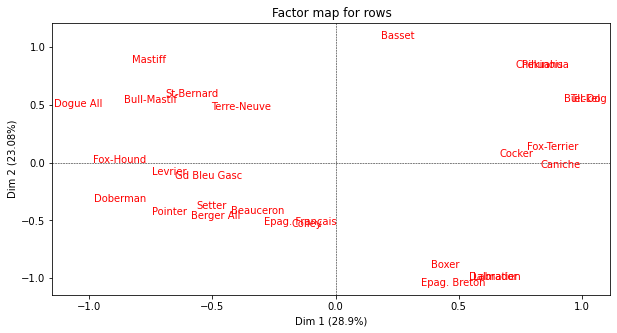

In [60]:
# Mapping des points lignes
my_mca.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(10,5))

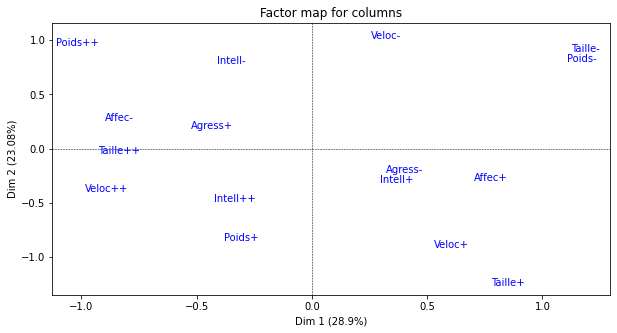

In [59]:
# Mapping des points colonnes
my_mca.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(10,5))

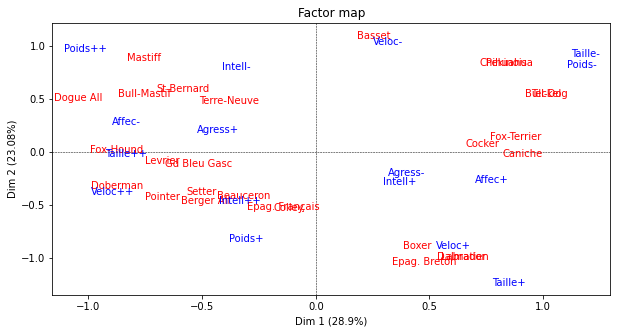

In [61]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont les axes 1 et 2 qui sont ici représentés
my_mca.mapping(num_x_axis=1, num_y_axis=2, figsize=(10,5))

In [ ]:
my_mca.mapping(num_x_axis=1, num_y_axis=2, short_labels=False)

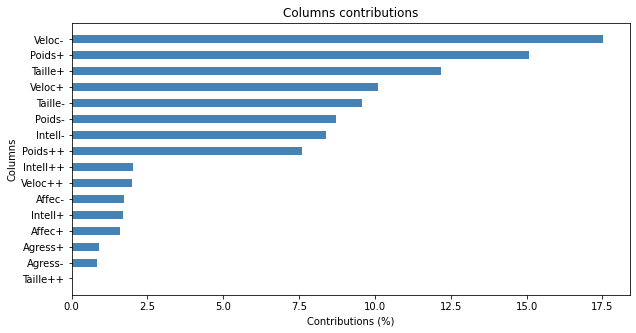

In [62]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_mca.plot_col_contrib(num_axis=2, figsize=(10,5))

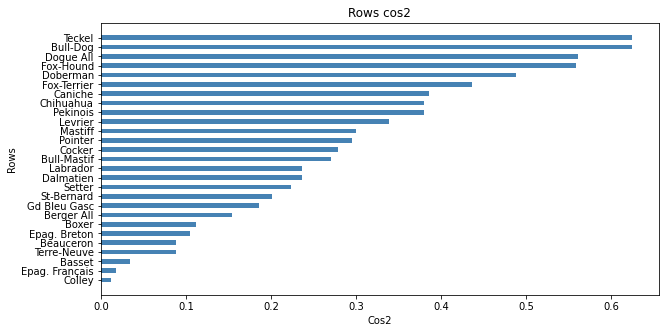

In [64]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_mca.plot_row_cos2(num_axis=1, figsize=(10,5))

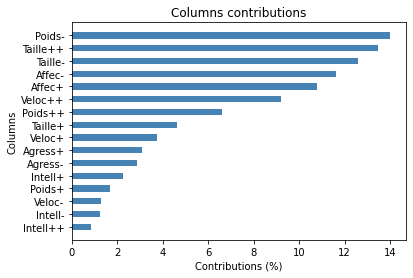

In [65]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_mca.plot_col_contrib(num_axis=1)

In [ ]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_mca.plot_col_cos2(num_axis=1)

Pour ces graphiques produits par les méthodes plot_row_contrib, plot_row_cos2, plot_col_contrib, plot_col_cos2, on peut se limiter à visualiser les x valeurs les plus grandes via le paramètre nb_values.

In [ ]:
my_mca.plot_row_contrib(num_axis=1, nb_values=10)